In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [109]:
df = pd.read_csv("placement_dataset.csv")

In [110]:
df.head(3)

,CGPA,Score,Placed
0,3.745401,18.513293,0
1,9.507143,54.190095,1
2,7.319939,87.294584,1


In [111]:
df.isnull().sum()

CGPA      0
Score     0
Placed    0
dtype: int64

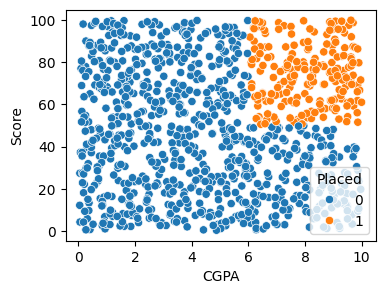

In [112]:

plt.figure(figsize=(4,3))
sns.scatterplot(x="CGPA" , y="Score" , data=df , hue="Placed")
plt.show()

In [161]:
x = df.iloc[:, :-1]
y = df["Placed"]

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
x_train, y_train , x_test , y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

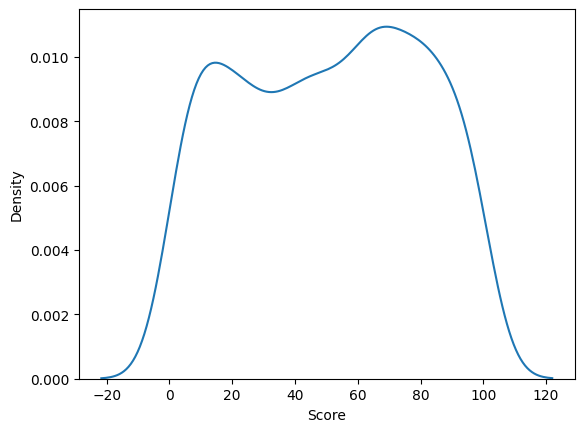

In [164]:
sns.kdeplot(data=df["Score"])
plt.show()
#  this is little normal distribution


#  Making a Model starts here

In [165]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB 
import numpy as np

In [169]:
X = np.random.rand(200, 5)

In [171]:
# Example target array y (200 samples, 2 columns)
y = np.random.randint(0, 2, size=(200, 2))


In [172]:
# Check the shape of y
print("Original shape of y:", y.shape)

# Flatten y by selecting the first column (adjust as needed)
y_flattened = y[:, 0]

# Check the new shape of y
print("New shape of y:", y_flattened.shape)

# Create a pandas DataFrame for features and target
df_features = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df_target = pd.DataFrame(y_flattened, columns=['target'])

# Combine features and target into one DataFrame
df = pd.concat([df_features, df_target], axis=1)

# Print the DataFrame
print(df)

Original shape of y: (200, 2)
New shape of y: (200,)
     feature_0  feature_1  feature_2  feature_3  feature_4  target
0     0.603665   0.343927   0.532851   0.477301   0.497032       0
1     0.160153   0.597881   0.642333   0.426831   0.265098       0
2     0.959190   0.314072   0.700436   0.611612   0.317043       0
3     0.126325   0.732473   0.834489   0.497406   0.695589       0
4     0.632230   0.862728   0.061177   0.160180   0.108880       1
..         ...        ...        ...        ...        ...     ...
195   0.096120   0.100082   0.604342   0.380085   0.070649       1
196   0.066940   0.785506   0.895941   0.091045   0.214556       0
197   0.798517   0.557556   0.281179   0.606517   0.852150       0
198   0.285508   0.699306   0.087212   0.146320   0.216051       1
199   0.404828   0.589256   0.031761   0.060547   0.245016       0

[200 rows x 6 columns]


In [179]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_flattened, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)


GaussianNB()

In [183]:
gnb.score(X_test , y_test)*100


65.0

In [188]:
mnb = MultinomialNB()
mnb.fit(X_train , y_train)

MultinomialNB()

In [190]:
mnb.score(X_test  , y_test)*100 , mnb.score(X_train  , y_train)*100

(52.5, 53.75)

In [191]:

bnb = BernoulliNB()
bnb.fit(X_train , y_train)

BernoulliNB()

In [193]:
bnb.score(X_test , y_test)*100 , bnb.score(X_test , y_test)*100

(50.0, 50.0)

In [204]:
gnb.predict([[6.17, 5.17 , 0 , 34, 34]])

array([1])